# Brief example using python coronagraph model

In [1]:
# Import relevant modules 
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=30, usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
#import readsmart as rs

In [2]:
import coronagraph as cg

In [3]:
rad_file = '../planets/F2V_5.e-1fCO2_1.e6H2Volc_1.e10BIF.out_toa.rad'

In [4]:
telescope = cg.Telescope()

In [5]:
planet = cg.Planet()

In [6]:
star = cg.Star()

In [22]:
print telescope
telescope.lammax = 2.0
telescope.IWA = 1.
telescope.mode = "IFS"

Coronagraph: 
------------
- Telescope observing mode : IFS
- Minimum wavelength (um) : 0.3
- Maximum wavelength (um)  : 2.0
- Spectral resolution (lambda / delta-lambda)  : 70.0 
- Telescope temperature (K)  : 274.0 
- Telescope diameter (m)  : 8.0 
- Telescope emissivity  : 0.9 
- Inner Working Angle (lambda/D)  : 0.5 
- Outer Working Angle (lambda/D)  : 30000.0 
- Telescope throughput  : 0.2 
- Raw Contrast  : 1e-10 
- Dark current (s**-1)  : 0.0001 
- Horizontal pixel spread of IFS spectrum  : 3.0 
- Read noise per pixel  : 0.1 
- Maximum exposure time (hr)  : 1.0 
- Size of photometric aperture (lambda/D)  : 0.7 
- Quantum efficiency  : 0.9


### Make a synthetic observation of a SMART output by calling:    
### `cg.smart_observation(rad, time, telescope, planet, star)`

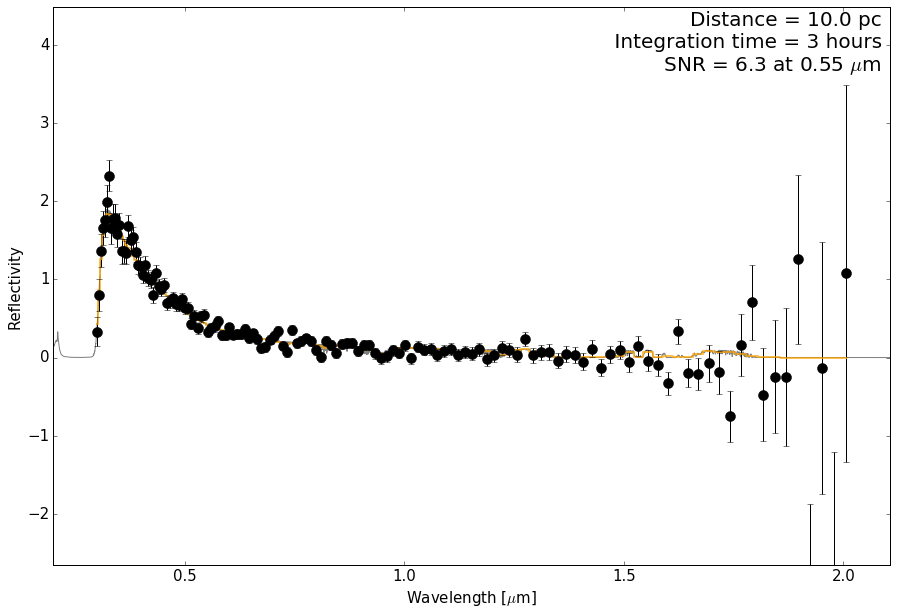

In [25]:
lam, spec, sig, wlhr, Ahr = cg.smart_observation(rad_file, 3.0, telescope, planet, star)

### Adjust parameters

In [ ]:
telescope.lammax = 1.5

In [ ]:
lam, spec, sig, wlhr, Ahr = cg.smart_observation(rad_file, 2.0, telescope, planet, star)

### Use `telescope` in *Imaging* mode

In [10]:
telescope.mode = "Imaging"

In [11]:
print telescope.filter_wheel

['U', 'B', 'V', 'R', 'I']



In [12]:
print telescope.filter_wheel.U

Filter: 
------------
- Name : U
- Bandcenter (um)  : 0.3656
- Full width at half max (um)  : 0.034
- Wavelength array (um)  : [ 0.3    0.305  0.31   0.315  0.32   0.325  0.33   0.335  0.34   0.345
  0.35   0.355  0.36   0.365  0.37   0.375  0.38   0.385  0.39   0.395  0.4
  0.405  0.41   0.415  0.42 ]
- Response : [ 0.     0.016  0.068  0.167  0.287  0.423  0.56   0.673  0.772  0.841
  0.905  0.943  0.981  0.993  1.     0.989  0.916  0.804  0.625  0.423
  0.238  0.114  0.051  0.019  0.   ]
- Notes  : Johnson-Cousins



coronagraph/convolve_spec.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (x[1].wl == None) or (x[1].response == None) or forceTopHat:


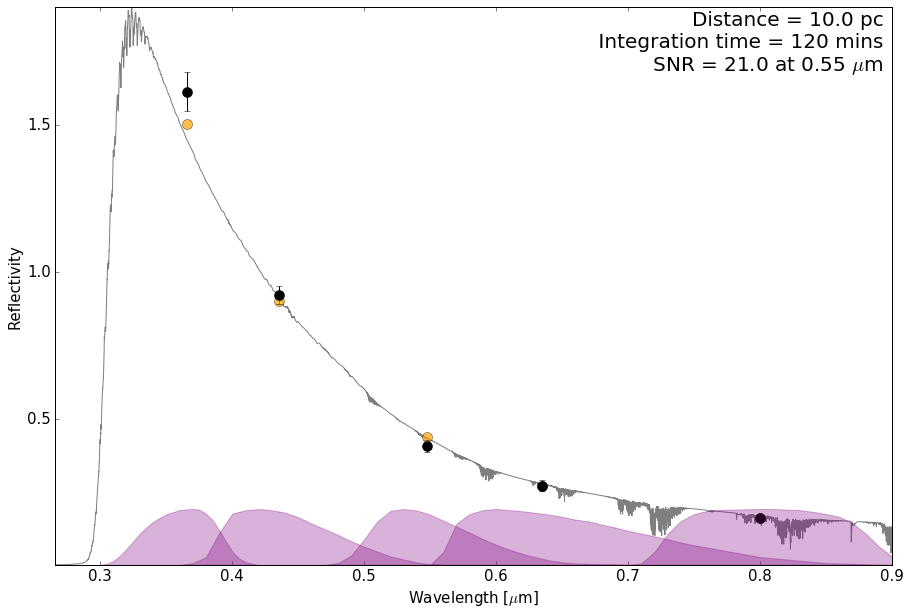

In [13]:
lam, spec, sig, wlhr, Ahr = cg.smart_observation(rad_file, 2.0, telescope, planet, star)

In [40]:
# Read-in wavelength, reflectance model
model = np.loadtxt('../planets/earth_quadrature_radiance_refl.dat', skiprows=8)
lam = model[:,0]            # wavelength (microns)
refl = np.pi * model[:,3]   # geometric albedo


In [41]:
telescope.lammin = 0.3
telescope.lammax = 1.5

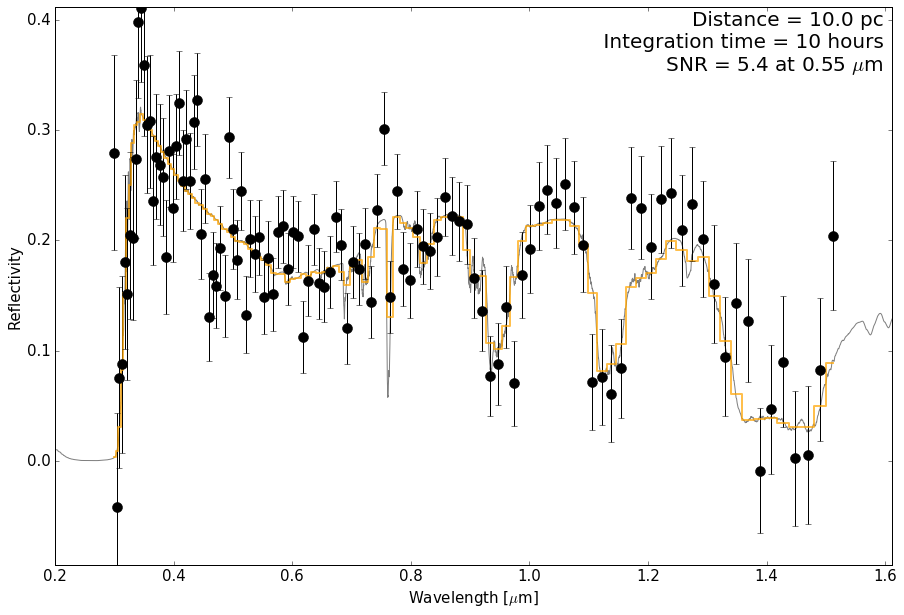

In [42]:
lam, spec, sig = cg.generate_observation(lam, refl, 10.0, telescope, planet, star)